# GRIP - May 23 @ Sparks Foundation (Data Science & Business Analytics)

## Author: Anand Kumar CS

## Task 6 - Prediction Using Decision Tree Algorithm and visualize it graphically.

### **Step 1:Import all Necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### **Step 2: Load the Data Set**

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
df = pd.DataFrame(iris['data'],columns=["petal_length","petal_width","sepal_length","sepal_width"])
df['species']=iris['target']
df.head()

,petal_length,petal_width,sepal_length,sepal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df['target'] = iris.target
df.head()

,petal_length,petal_width,sepal_length,sepal_width,species,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


### **Step 3:Exploratory Data Analysis**

In [7]:
# Returns number of rows and columns of dataset
df.shape

(150, 6)

In [9]:
# Returns information about count of values in each column,null values, datatypes and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   species       150 non-null    int32  
 5   target        150 non-null    int32  
dtypes: float64(4), int32(2)
memory usage: 6.0 KB


In [10]:
# Returns statistical summary about data
df.describe()

,petal_length,petal_width,sepal_length,sepal_width,species,target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000


In [11]:
#check for null values
df.isnull().sum()

petal_length    0
petal_width     0
sepal_length    0
sepal_width     0
species         0
target          0
dtype: int64

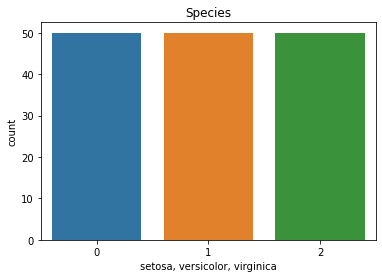

In [73]:
#count plot for Target variables
sns.countplot(x='target',data=df)
plt.title("Species")
plt.xlabel('setosa, versicolor, virginica')
plt.show() 

count for each species is found to be balanced

### **Step 4:Decision Tree Model Building**

In [12]:
x = df.drop(['target'], axis = 1)
y = df['target']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
dtree = DecisionTreeClassifier(random_state=12)
model = dtree.fit(x_train,y_train)
ypred = model.predict(x_test)
print('Accuracy score is:',accuracy_score(y_test,ypred))

Accuracy score is: 1.0


In [ ]:
## Here the Accuracy score is 1 which clealry indicating the model is Overfitting. For Removing the Overfitting we need to
## do HyperParameter Tunning.

### **Step 5 : Evaluating model**

In [15]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': ypred}) 
df1.head(15)

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


### **Step 6 : Visualizing Decision Tree**

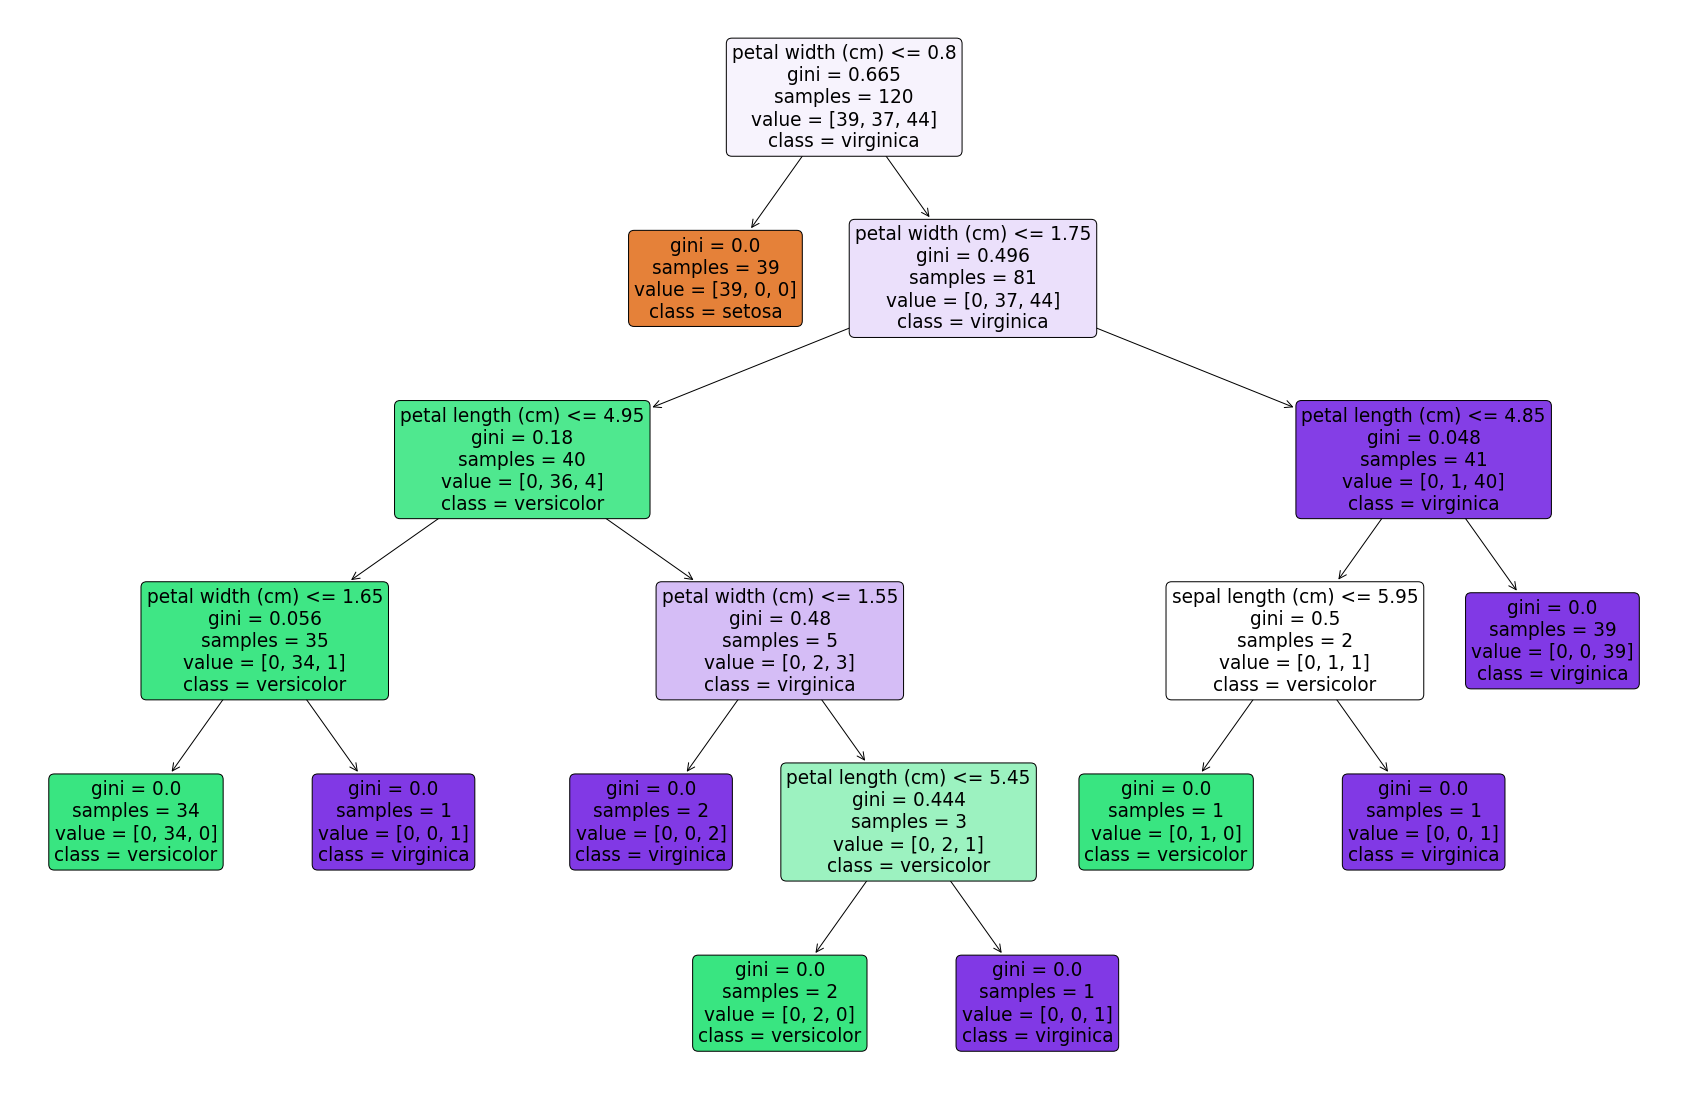

In [57]:
plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names = iris.feature_names,  
               class_names = iris.target_names,
               rounded=True,filled=True)
plt.show()

### **Step 7 - Predicting the class output for some random values of petal and sepal length and width**

In [59]:
print("Class Names = ",iris.target_names)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.9cm and 3.0cm and sepal length and width are 1.4cm and 0.2cm. ")
print()
print('Output = ', model.predict([[4.9, 3.0, 1.4, 0.2]]))
print()
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 4.9cm and 3.0cm and sepal length and width are 1.4cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.


### Info About the Decision Tree 

**A decision tree is a machine learning algorithm used for classification and regression tasks. It creates a flowchart-like model where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents the outcome or prediction.

`Gini impurity` and `Entropy` are measures used to determine the quality of a split in a decision tree. They evaluate the homogeneity of a node's class distribution. Here's a brief explanation of each:

`Gini impurity:` It measures the probability of misclassifying a randomly chosen element if it were randomly labeled according to the class distribution in the node. A lower Gini impurity indicates a more pure node with predominantly one class.

`Entropy:` It calculates the level of impurity or disorder in a node. It measures the average amount of information needed to identify the class of a randomly chosen element from the node. A lower entropy value indicates a more pure node.

`Information gain` is a criterion used to determine the best feature to split on at each node. It quantifies the reduction in impurity achieved by splitting the data based on a particular feature. It compares the impurity of the parent node to the weighted average impurity of the child nodes. The feature with the highest information gain is chosen as the splitting criterion.

Advantages of decision trees:

* Easy to understand and interpret due to their tree-like structure.
* Can handle both numerical and categorical features.
* Can capture non-linear relationships and interactions between features.
* Require minimal data preprocessing and handle missing values well.
* Provide feature importance rankings.

Disadvantages of decision trees:

* Prone to overfitting, especially with complex trees.
* Can be sensitive to small variations in the data, leading to different tree structures.
* May create biased trees if some classes dominate the dataset.
* Not suitable for problems where the classes are highly imbalanced.
* Lack of stability, meaning small changes in the data may result in a significantly different tree.



